# 코랩에서 한글 사용하기

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

## 서울시 일자와 온도 확인하기


### 1. csv 모듈을 이용
- [모두의 데이터 분석] 51페이지 참조
- 데이터: seoul_weather.csv
- 폴더위치: content
- 맨 윗줄은 header 변수에 저장
- 최고 기온/날짜 저장 변수 초기화
- 누락된 온도를 찾아 -999로 저장
- 문자열로 저장된 온도를 실수형 자료로 변경
- 최고 높은 온도와 해당 날짜 찾기 및 출력
  * for / if 구문 사용


코랩에서 파일 업로드

In [2]:
from google.colab import files
files.upload()

Saving seoul_weather.csv to seoul_weather.csv


{'seoul_weather.csv': b'\xc1\xf6\xc1\xa1\xb8\xed,\xc0\xcf\xbd\xc3,\xc6\xf2\xb1\xd5\xb1\xe2\xbf\xc2(\xa1\xc9),\xc3\xd6\xc0\xfa\xb1\xe2\xbf\xc2(\xa1\xc9),\xc3\xd6\xb0\xed\xb1\xe2\xbf\xc2(\xa1\xc9)\r\n\xbc\xad\xbf\xef,1907-10-01,13.5,7.9,20.7\r\n\xbc\xad\xbf\xef,1907-10-02,16.2,7.9,22\r\n\xbc\xad\xbf\xef,1907-10-03,16.2,13.1,21.3\r\n\xbc\xad\xbf\xef,1907-10-04,16.5,11.2,22\r\n\xbc\xad\xbf\xef,1907-10-05,17.6,10.9,25.4\r\n\xbc\xad\xbf\xef,1907-10-06,13,11.2,21.3\r\n\xbc\xad\xbf\xef,1907-10-07,11.3,6.3,16.1\r\n\xbc\xad\xbf\xef,1907-10-08,8.9,3.9,14.9\r\n\xbc\xad\xbf\xef,1907-10-09,11.6,3.8,21.1\r\n\xbc\xad\xbf\xef,1907-10-10,14.2,6.4,24.1\r\n\xbc\xad\xbf\xef,1907-10-11,15.4,10.1,20.4\r\n\xbc\xad\xbf\xef,1907-10-12,13.9,11.1,17.4\r\n\xbc\xad\xbf\xef,1907-10-13,13.8,8.3,21.3\r\n\xbc\xad\xbf\xef,1907-10-14,13,6.1,20.6\r\n\xbc\xad\xbf\xef,1907-10-15,13.1,5.7,20.9\r\n\xbc\xad\xbf\xef,1907-10-16,14.1,8.2,20.2\r\n\xbc\xad\xbf\xef,1907-10-17,16.4,10.3,21.6\r\n\xbc\xad\xbf\xef,1907-10-18,14.3,9.8,20

csv 모듈로 데이터 읽어오기

In [44]:
import csv      # 모듈 연결
import time

In [47]:
# NaN 값을 try: ~ except: ~ 로 처리하는 코드

strt=time.time()
f = open("seoul_weather.csv", encoding="cp949")    # 파일 연결
data = csv.reader(f)                # csv 로 읽어오면 코드 처리 후 메모리에 자료 x , data = list[csv.reader(f)] 즉, list로 읽어오면 메모리에 계속 저장
header = next(data)
print(header)
# list(data)[:5]          => csv로 읽어온 자료 따로 list 저장(** 이후 기존 자료는 메모리에서 삭제된다.)

# "최고 기온" 중 가장 높은 "온도 값" / 해당 온도의 "일시"를 출력
# 일자별 최고 온도 찾기 => 이 온도의 날짜 가져오기

max_temp = -999    # 최고 온도를 계산하기 위한 변수(최초 -999 부여)
max_date = ""      # 최고 온도를 찾았을때 날짜를 저장할 변수

for row in data:
    try:
        row[-1] = float(row[-1])   # row의 마지막 데이터(최고기온)의 dtype => 실수형으로 변경

        if max_temp < row[-1]:
              max_temp=row[-1]
              max_date=row[1]
    except:
        continue      # 오류 값 무시하고 실행
        #row[-1] = -999   => 오류난 값을 바꾸고자 할때 실행
        #print(f"fow[-1]에 입력된 값:{row[-1]}입니다.")

f.close()

print(f"기상관측을 시작한 이래 서울의 최고 기온은 {max_temp}이며, 이에 해당하는 날짜는 {max_date}입니다.")

endt = time.time()
print(endt-strt)

['지점명', '일시', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
기상관측을 시작한 이래 서울의 최고 기온은 39.6이며, 이에 해당하는 날짜는 2018-08-01입니다.
0.08433365821838379


In [48]:
# NaN을 if를 이용해 처리하는 코드

# 파일연결
strt=time.time()
f = open("seoul_weather.csv", encoding="cp949")
data = csv.reader(f)
header=next(data)
print(header, "\n")

# "최고기온" 중 가장 높은 온도값/해당 온도의 "일시"를 출력
# 일자별 최고 온도 찾기 = > 이 온도의 날짜 가져오기

max_temp=-999     # 최고 온도를 계산하기 위한 변수(최초 -999 부여)
max_date=""       # 최고 온도를 찾았을때 날짜를 저장할 변수

for row in data:
    # row 값 => ['서울', '1907-10-01', '13.5', '7.9', '20.7']
    # NaN 값 처리
    if row[-1] == "":
        row[-1] = -999

    # row의 마지막 데이터(최고기온)의 dtype => 실수형으로 변경
    row[-1] = float(row[-1])   

    # 현재 최고온도가 기본 최고온도보다 높다면 기본온도 변경
    if max_temp < row[-1]:     
        max_temp = row[-1]
        max_date = row[1]

f.close()

print(f"기상관측을 시작한 이래 서울의 최고 기온은 {max_temp}이고, 날짜는 {max_date} 입니다.")

endt = time.time()
print(endt-strt)

['지점명', '일시', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'] 

기상관측을 시작한 이래 서울의 최고 기온은 39.6이고, 날짜는 2018-08-01 입니다.
0.061417341232299805


### 2. pandas 모듈 이용하기



In [36]:
# 모듈 연결 및 파일 읽기

import pandas as pd

df = pd.read_csv("seoul_weather.csv", encoding="cp949")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41382 entries, 0 to 41381
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점명      41382 non-null  object 
 1   일시       41382 non-null  object 
 2   평균기온(℃)  40626 non-null  float64
 3   최저기온(℃)  40625 non-null  float64
 4   최고기온(℃)  40624 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.6+ MB


In [38]:
# 결측지(NaN) 처리 => 한 행에 3개 이상 존재하면 해당 행 삭제

print(df.isna().sum())     # 각 필드(열)별 NaN 개수 확인

df = df.dropna(thresh=3)
print(df.isna().sum())   # 삭제 후

지점명          0
일시           0
평균기온(℃)    756
최저기온(℃)    757
최고기온(℃)    758
dtype: int64
지점명        0
일시         0
평균기온(℃)    0
최저기온(℃)    1
최고기온(℃)    2
dtype: int64


In [39]:
# NaN이 2개 이하인 데이터는 아래와 같이 바로 앞 또는 뒤 행의 값으로 채우기
# 결측값의 앞 행의 값으로 채우기 : df.fillna(method='ffill')
# 결측값의 뒷 행의 값으로 채우기 : df.fillna(method='bfill')
# 각 열의 평균 값으로 채우기 : df.fillna(df.mean())

df = df.fillna(method='ffill')
print(df.isna().sum())

지점명        0
일시         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64


In [43]:
df1 = df[df['최고기온(℃)'] == df['최고기온(℃)'].max()][["일시", '최고기온(℃)']]
print(f"기상관측을 시작한 이래 서울의 최고 기온은 {df1.iloc[0, 1]}이며, 그 날짜는 {df1.iloc[0, 0]}입니다.")

기상관측을 시작한 이래 서울의 최고 기온은 39.6이며, 그 날짜는 2018-08-01입니다.


In [50]:
strt=time.time()

df = pd.read_csv("seoul_weather.csv", encoding="cp949")
df.info()

# 결측지(NaN) 처리 => 한행에 3개이상 존재하면 해당 행 삭제
print(df.isna().sum())   # 각 필드(열)별 NaN 갯수 확인(삭제전)

df=df.dropna(thresh=3)
print(df.isna().sum())   # 삭제후
df=df.fillna(method='ffill')
print(df.isna().sum())  

df1=df[df['최고기온(℃)'] == df['최고기온(℃)'].max()][["일시", "최고기온(℃)"]]
print(f"기상관측을 시작한 이래 서울의 최고 기온은 {df1.iloc[0, 0]}이고, 날짜는 {df1.iloc[0, 1]} 입니다.")

endt=time.time()
print(endt-strt)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41382 entries, 0 to 41381
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점명      41382 non-null  object 
 1   일시       41382 non-null  object 
 2   평균기온(℃)  40626 non-null  float64
 3   최저기온(℃)  40625 non-null  float64
 4   최고기온(℃)  40624 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.6+ MB
지점명          0
일시           0
평균기온(℃)    756
최저기온(℃)    757
최고기온(℃)    758
dtype: int64
지점명        0
일시         0
평균기온(℃)    0
최저기온(℃)    1
최고기온(℃)    2
dtype: int64
지점명        0
일시         0
평균기온(℃)    0
최저기온(℃)    0
최고기온(℃)    0
dtype: int64
기상관측을 시작한 이래 서울의 최고 기온은 2018-08-01이고, 날짜는 39.6 입니다.
0.11822295188903809


# 내 생일의 기온변화 그래프 그리기

- 날씨 데이터 읽어오기
- 헤더 부분(제목)을 next() 함수를 사용해 제외
- 내 생일의 최고기온/최저기온 저장 변수 생성

In [99]:
# csv 파일 읽어오기

import csv

f = open("seoul_weather.csv", encoding="cp949")
data = csv.reader(f)
header=next(data)
print(header)

['지점명', '일시', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']


- 년도별 생일날의 최고기온/최저기온 추출하기
- 추출한 데이터 리스트 변수에 저장하기

1. 최고 / 최저 / 년도별 생일 저장 리스트 변수
2. data에서 태어난 년도 이후의 생일의 기온 가져오기
- 데이터들 중 NaN 값에 대한 처리 고민
- 데이터 형식 => 모두 텍스트 => int / float 수정
- 년도만 가져와 int 변경 후 이 값이 태어난 년도보다 크면서, 월과 일이 생일과 일치하는지 확인 => 일치하면 데이터 추가(년도, 최저기온, 최고기온)
- 년도만 가져오려면 ? / 월만 가져오려면? / 일만 가져오려 ?
3. 시각화
- matpoltlib을 이용한 차트 작성
- 하나의 차트에 최저 / 최고 같이 출력

In [115]:
# 모든 생일날의 최고/최저 온도와 날짜 받아오기

max_tmp = -999
min_tmp = 999
br_date = "1994-02-25"

for i in data:
    if i[1] == "":
        i[1] = 0

    i[1] = int(i[1])
        if i[1].split("-")[0] >= int("1994-02-25".split("-")[0]):


IndentationError: ignored

In [100]:
import csv

f = open("seoul_weather.csv", encoding="cp949")
data = csv.reader(f)
header=next(data)
print(header)

max_temp = []
min_temp = []
date_tmp = []


for i in data:
    if i[-2] != "" and i[-1] != "":   # NaN 확인(최고 / 최저 기온 모두 값이 있다면 / NaN이 아니라면)
        if int(i[1].split("-")[0]) >= 1994:
            if i[1].split("-")[1] == "02" and i[1].split("-")[2] == "25":
                max_temp.append(float(i[-1]))
                min_temp.append(float(i[-2]))
                date_tmp.append(i[1].split("-")[0])

print(max_temp)
print(min_temp)
print(date_tmp)

[8.1, 6.7, 5.9, 7.6, 15.0, 9.6, 2.0, 3.8, 8.4, 9.1, 10.6, -1.5, 10.8, 11.5, 2.5, 6.4, 14.8, 6.3, 5.0, 8.6, 12.3, 12.5, 5.7, 8.4, 7.9, 10.2, 9.4, 8.2, 8.4]
[-0.3, 1.0, -1.2, 4.3, 3.3, 1.8, -6.9, -4.7, 2.6, 1.5, 2.4, -7.3, 2.7, 4.5, -3.1, -0.8, 9.8, -0.8, -2.3, -0.7, 0.6, 0.2, -5.8, -2.8, -1.6, 1.3, 4.7, 0.7, -3.6]
['1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']


- 그래프 그리기

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


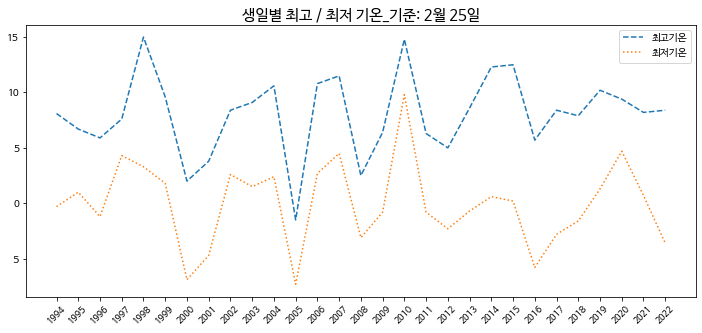

In [114]:
from IPython.core.pylabtools import figsize
# 최고/최저 온도를 출력하는 차트 그리기

import matplotlib.pyplot as plt

plt.rc('font', family = "NanumBarunGothic")

plt.figure(figsize = (12, 5))

#x = date_tmp
plt.plot(max_temp, "--", label="최고기온")
plt.plot(min_temp, ":", label="최저기온")

plt.title("생일별 최고 / 최저 기온_기준: 2월 25일", size = 15)
plt.legend()
plt.xticks(list(range(len(date_tmp))), labels=date_tmp, rotation=45, size=9)

plt.show()

##### pandas 모듈 이용

In [ ]:
# pandas 모듈로 파일 읽어오기

import pandas as pd

df = pd.read_csv("seoul_weather.csv", encoding="cp949")
#df.info()

# df에서 "일시" 날짜형 데이터로 변경하기

df["일시"] = pd.to_datetime(df["일시"])
print(df.dtypes)

# NaN 값 처리하기

df=df.dropna(thresh=3)
#print(df.isna().sum())   # 삭제후
df=df.fillna(method='ffill')
#print(df.isna().sum())

# 생일을 기준으로 오늘날짜까지 생일날의 최고/최저 온도 추출하기

bir_df = df[(df["일시"] >= "1994-02-25") & (df["일시"].dt.month==2) & (df["일시"].dt.day==25)]
bir_df

In [131]:
bir_df.columns

Index(['지점명', '일시', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


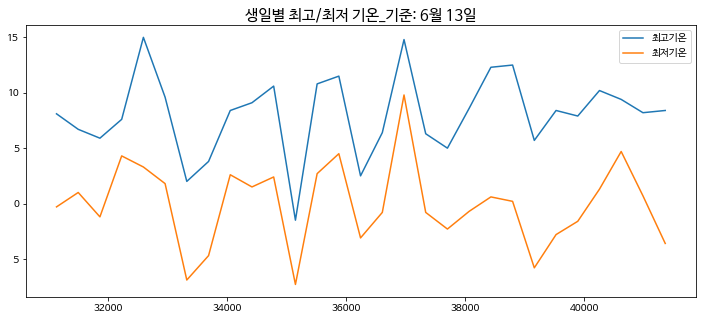

In [136]:
# 차트에 출력하기
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

plt.figure( figsize = (12, 5))
plt.plot(bir_df['최고기온(℃)'], label="최고기온")
plt.plot(bir_df['최저기온(℃)'], label="최저기온")

date_lst = bir_df["일시"].dt.year

plt.title("생일별 최고/최저 기온_기준: 6월 13일", size = 15)
plt.legend()
#plt.xticks(date_lst, labels=date_lst, rotation=90, size=9)

plt.show()

In [138]:
### 유가정보

df2 = pd.read_csv("서울시 유류정보_0314.csv", encoding="cp949")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      225 non-null    object 
 1   상표      225 non-null    object 
 2   구       225 non-null    object 
 3   셀프여부    225 non-null    object 
 4   휘발유     225 non-null    float64
 5   경유      225 non-null    float64
dtypes: float64(2), object(4)
memory usage: 10.7+ KB


In [139]:
df3=df2.groupby("구").mean()
display(df3)

,휘발유,경유
구,,
강남구,2141.164324,2033.609009
강동구,2065.384762,1955.798413
강북구,2001.230769,1912.153846
노원구,2035.933333,1938.666667
도봉구,2016.927407,1931.398765
마포구,2071.750000,1972.833333
서초구,2068.696970,1977.393939
송파구,2013.687500,1911.093750
양천구,2001.760000,1929.840000


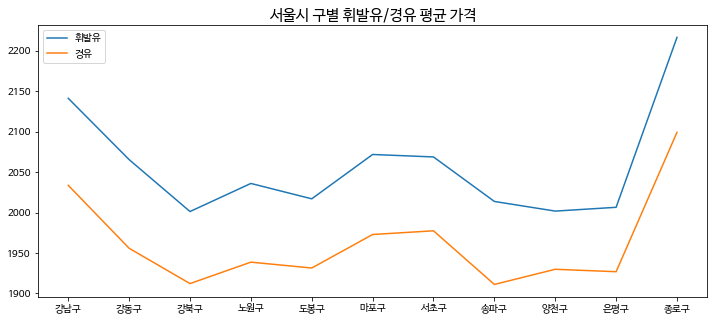

In [140]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

plt.figure( figsize = (12, 5))
plt.plot(df3['휘발유'], label="휘발유")
plt.plot(df3['경유'], label="경유")

plt.title("서울시 구별 휘발유/경유 평균 가격", size = 15)
plt.legend()

plt.show()

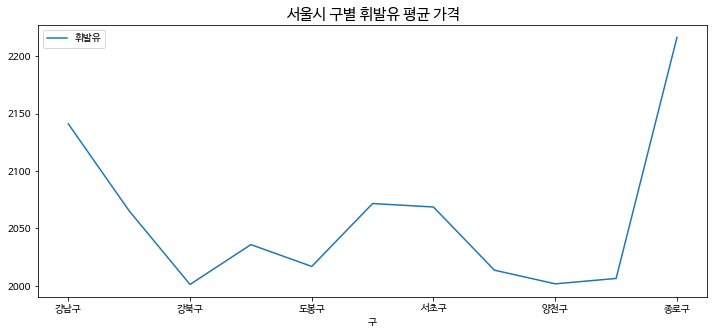

In [141]:
plt.rc('font', family='NanumBarunGothic')

plt.figure( figsize = (12, 5))
df3["휘발유"].plot()

plt.title("서울시 구별 휘발유 평균 가격", size = 15)
plt.legend()

plt.show()

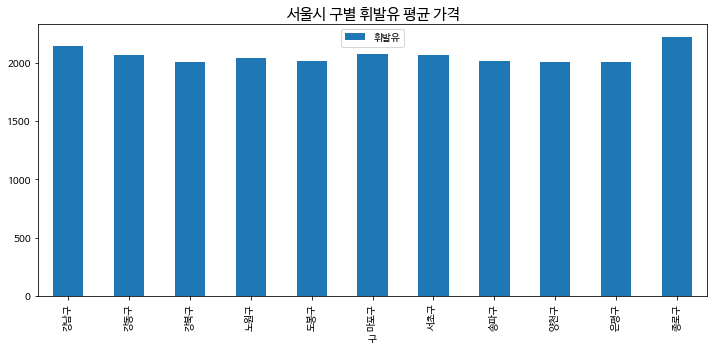

In [142]:
plt.rc('font', family='NanumBarunGothic')

plt.figure( figsize = (12, 5))
df3["휘발유"].plot(kind="bar")

plt.title("서울시 구별 휘발유 평균 가격", size = 15)
plt.legend()

plt.show()

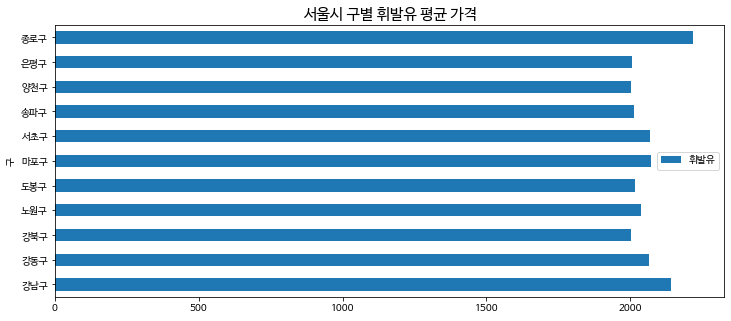

In [143]:
plt.rc('font', family='NanumBarunGothic')

plt.figure( figsize = (12, 5))
df3["휘발유"].plot(kind="barh")

plt.title("서울시 구별 휘발유 평균 가격", size = 15)
plt.legend()

plt.show()